In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [3]:
np.random.seed(42)
dates = pd.date_range(start='2025-01-01', periods=100)
actual_prices = np.cumsum(np.random.randn(100)) + 100
predicted_prices = actual_prices + np.random.randn(100)
errors = actual_prices - predicted_prices
feature_importances = np.random.rand(5)
features = ['RSI', 'MACD', 'Volume', 'SMA', 'EMA']

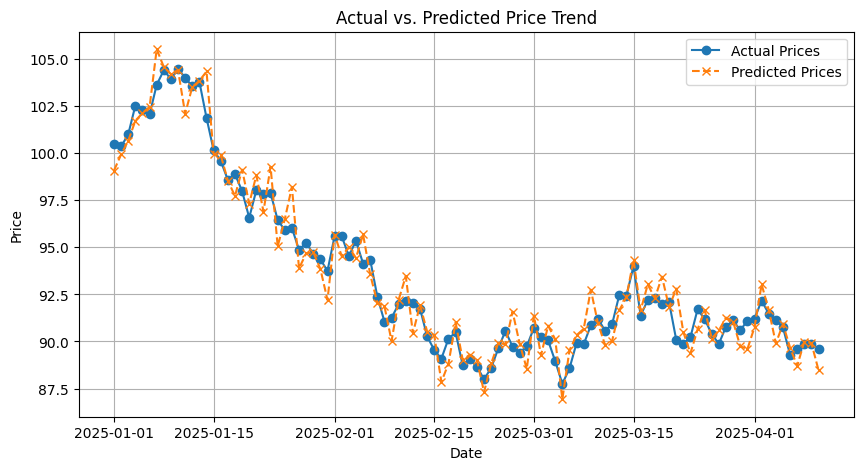

In [4]:
plt.figure(figsize=(10, 5))
plt.plot(dates, actual_prices, label='Actual Prices', marker='o')
plt.plot(dates, predicted_prices, label='Predicted Prices', linestyle='--', marker='x')
plt.title('Actual vs. Predicted Price Trend')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

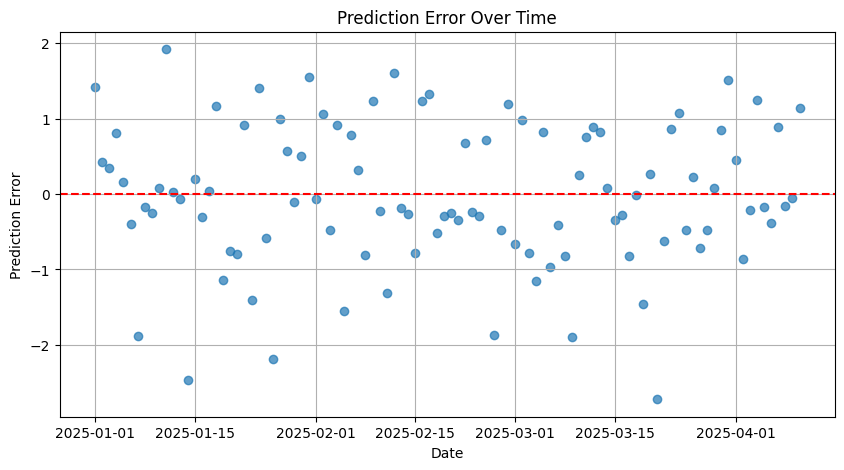

In [5]:
plt.figure(figsize=(10, 5))
plt.scatter(dates, errors, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title('Prediction Error Over Time')
plt.xlabel('Date')
plt.ylabel('Prediction Error')
plt.grid(True)
plt.show()

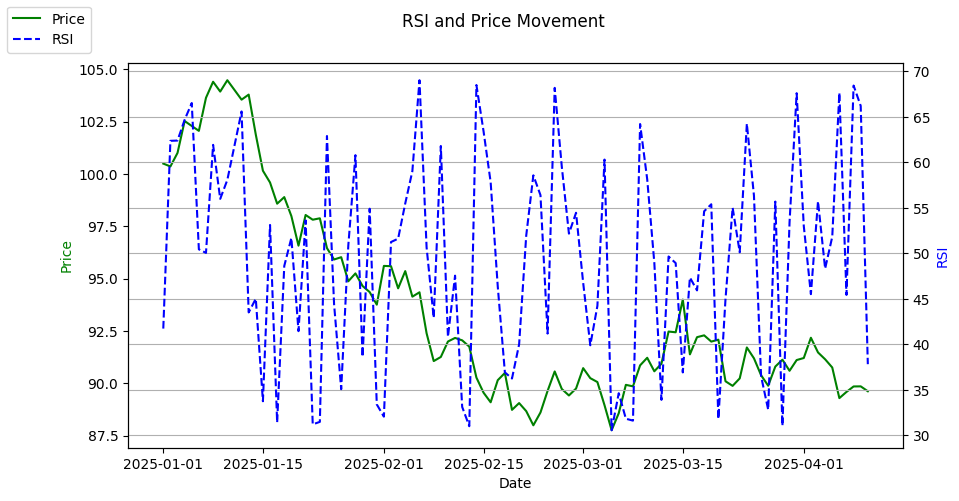

In [6]:
RSI = np.random.uniform(30, 70, size=100)
fig, ax1 = plt.subplots(figsize=(10, 5))
ax2 = ax1.twinx()
ax1.plot(dates, actual_prices, 'g-', label='Price')
ax2.plot(dates, RSI, 'b--', label='RSI')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price', color='g')
ax2.set_ylabel('RSI', color='b')
fig.suptitle('RSI and Price Movement')
fig.legend(loc='upper left')
plt.grid(True)
plt.show()

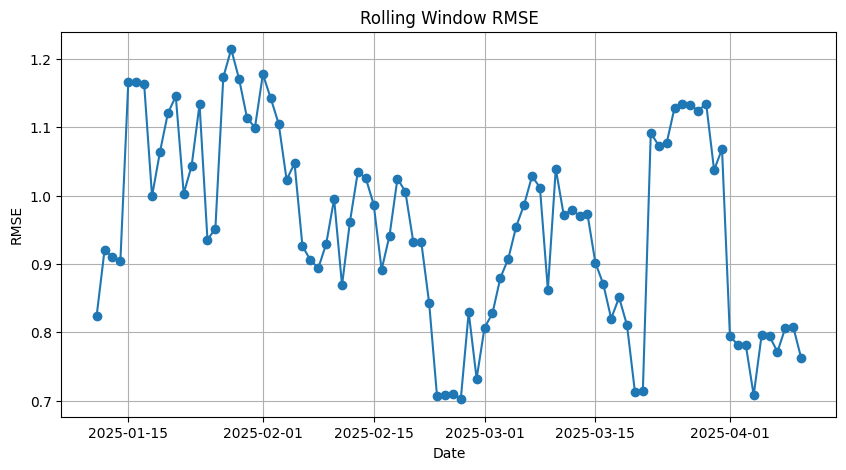

In [7]:
window_size = 10
rolling_rmse = [np.sqrt(np.mean(errors[i:i+window_size]**2)) for i in range(len(errors)-window_size)]
plt.figure(figsize=(10, 5))
plt.plot(dates[window_size:], rolling_rmse, marker='o')
plt.title('Rolling Window RMSE')
plt.xlabel('Date')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()

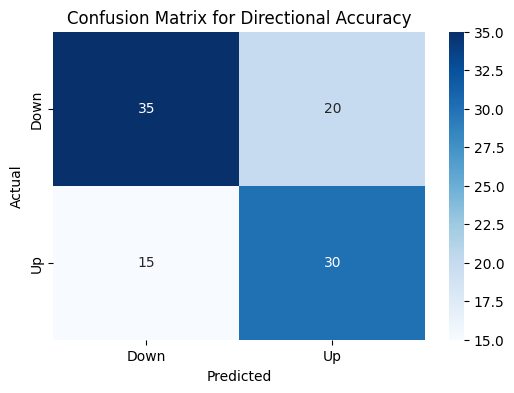

In [8]:
from sklearn.metrics import confusion_matrix

actual_direction = np.where(np.diff(actual_prices, prepend=actual_prices[0]) > 0, 1, 0)
predicted_direction = np.where(np.diff(predicted_prices, prepend=predicted_prices[0]) > 0, 1, 0)
cm = confusion_matrix(actual_direction, predicted_direction)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.title('Confusion Matrix for Directional Accuracy')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

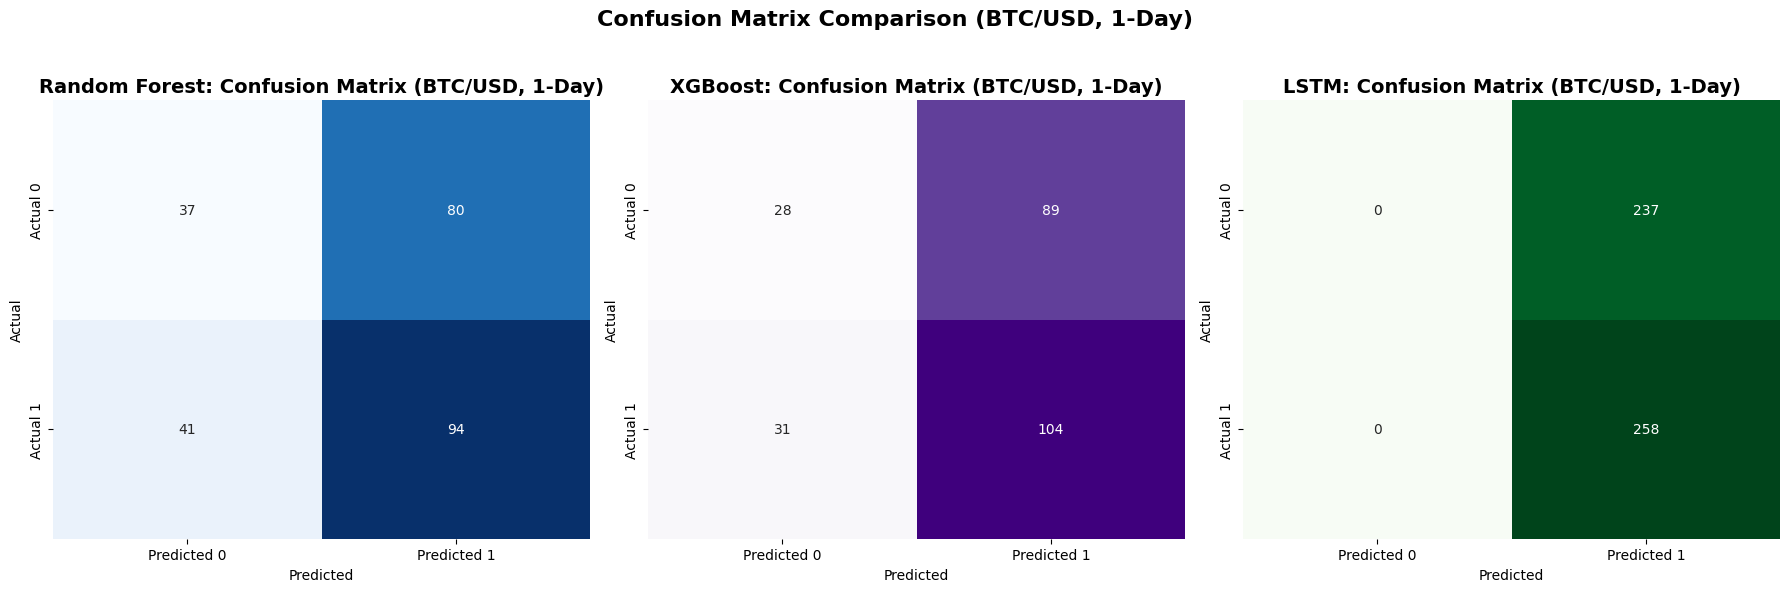

In [21]:
rf_cm = np.array([[37, 80], [41, 94]])
xgb_cm = np.array([[28, 89], [31, 104]])
lstm_cm = np.array([[0, 237], [0, 258]])

# Set up the figure for side-by-side plot
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Color palettes for each model
cmaps = ["Blues", "Purples", "Greens"]
titles = ["Random Forest", "XGBoost", "LSTM"]

# Loop to create each heatmap
for ax, cm, title, cmap in zip(axes, [rf_cm, xgb_cm, lstm_cm], titles, cmaps):
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, ax=ax, cbar=False,
                xticklabels=["Predicted 0", "Predicted 1"],
                yticklabels=["Actual 0", "Actual 1"])
    ax.set_title(f"{title}: Confusion Matrix (BTC/USD, 1-Day)", fontsize=14, fontweight='bold')
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

# Add a main title
plt.suptitle("Confusion Matrix Comparison (BTC/USD, 1-Day)", fontsize=16, fontweight='bold')

# Adjust layout and save the plot
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("outputs/plots/confusion_matrices_comparison_final.png", dpi=300)
plt.show()

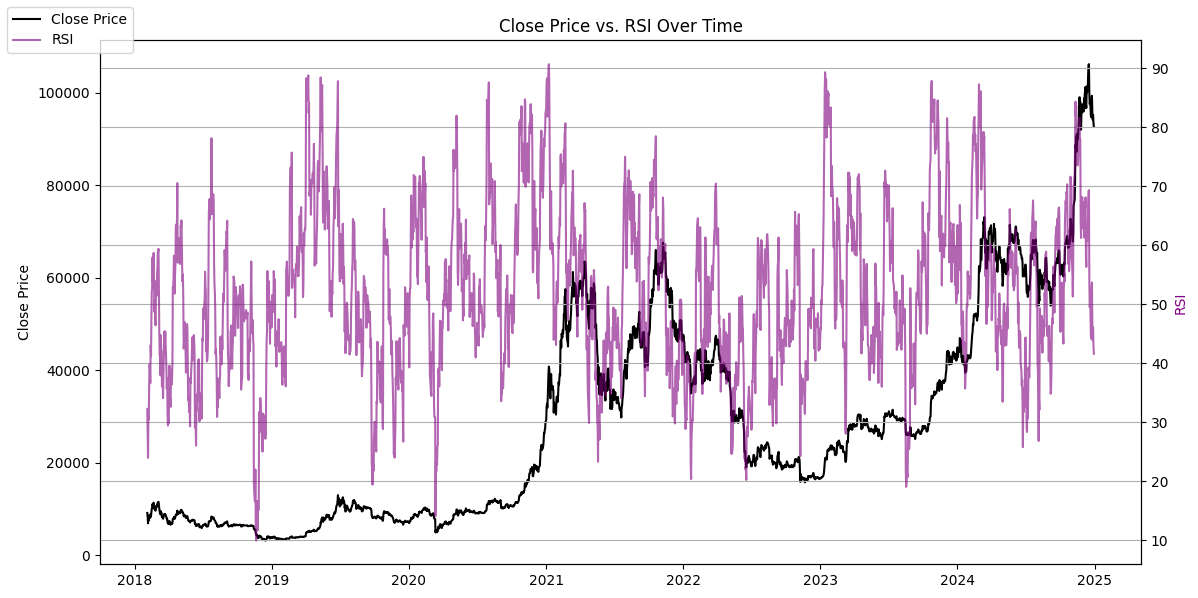

In [9]:

df = pd.read_csv('/Users/g/Desktop/Projects/Machine-Learning/outputs/labeled_data/BTC_USD_processed.csv', parse_dates=['Price'])
df.set_index('Price', inplace=True)

# Plot
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()

ax1.plot(df.index, df['Close'], label='Close Price', color='black')
ax2.plot(df.index, df['RSI'], label='RSI', color='purple', alpha=0.6)

ax1.set_ylabel('Close Price')
ax2.set_ylabel('RSI', color='purple')
ax1.set_title("Close Price vs. RSI Over Time")
fig.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


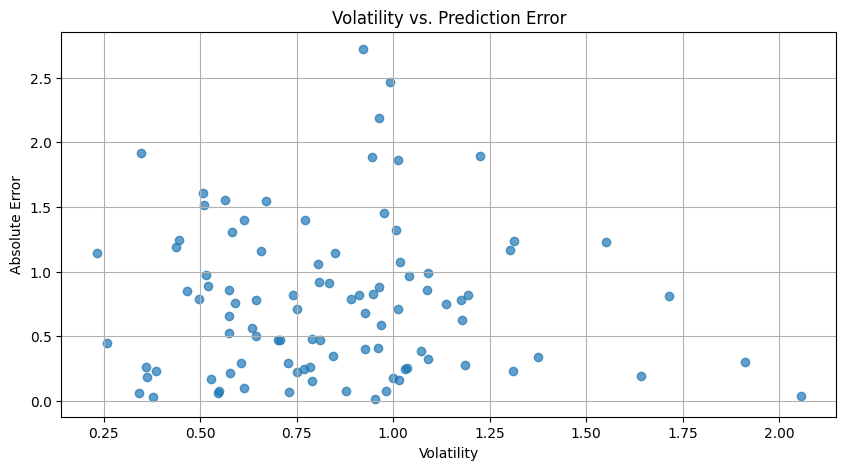

In [10]:
volatility = pd.Series(actual_prices).rolling(window=5).std()
plt.figure(figsize=(10, 5))
plt.scatter(volatility, np.abs(errors), alpha=0.7)
plt.title('Volatility vs. Prediction Error')
plt.xlabel('Volatility')
plt.ylabel('Absolute Error')
plt.grid(True)
plt.show()


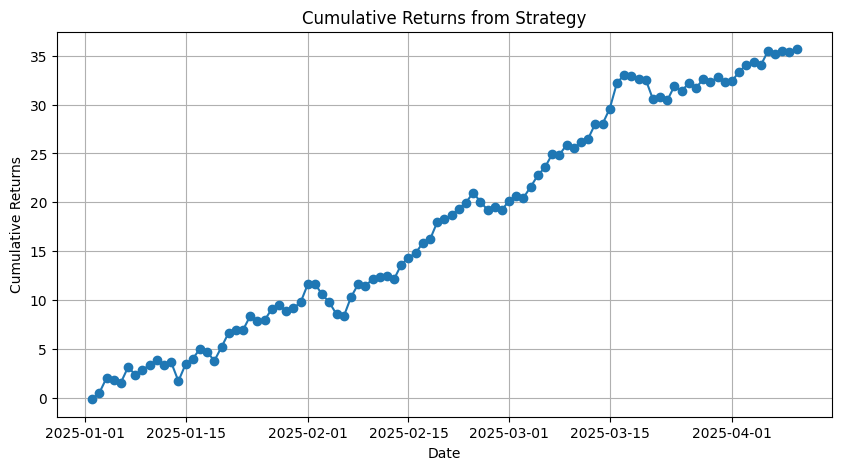

In [11]:
strategy_returns = np.sign(predicted_prices[1:] - predicted_prices[:-1]) * (actual_prices[1:] - actual_prices[:-1])
cumulative_returns = np.cumsum(strategy_returns)
plt.figure(figsize=(10, 5))
plt.plot(dates[1:], cumulative_returns, marker='o')
plt.title('Cumulative Returns from Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.grid(True)
plt.show()

In [15]:
from xgboost import XGBClassifier
import pandas as pd


# Reload dataset and train/test split
df = pd.read_csv('//Users/g/Desktop/Projects/Machine-Learning/outputs/labeled_data/BTC_USD_processed.csv')

features = [
    "RSI", "MACD_12_26_9", "MACDs_12_26_9",
    "BBL_5_2.0", "BBM_5_2.0", "BBU_5_2.0",
    "SMA_20", "EMA_20", "OBV"
]
target = "Target_1d"

df.dropna(subset=features + [target], inplace=True)
train_size = int(0.8 * len(df))
train = df[:train_size]
val = df[train_size:]

X_val = val[features]
y_val = val[target]

# Train XGBoost model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(train[features], train[target])

# Now make predictions
y_pred = model.predict(X_val)



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [20:56:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


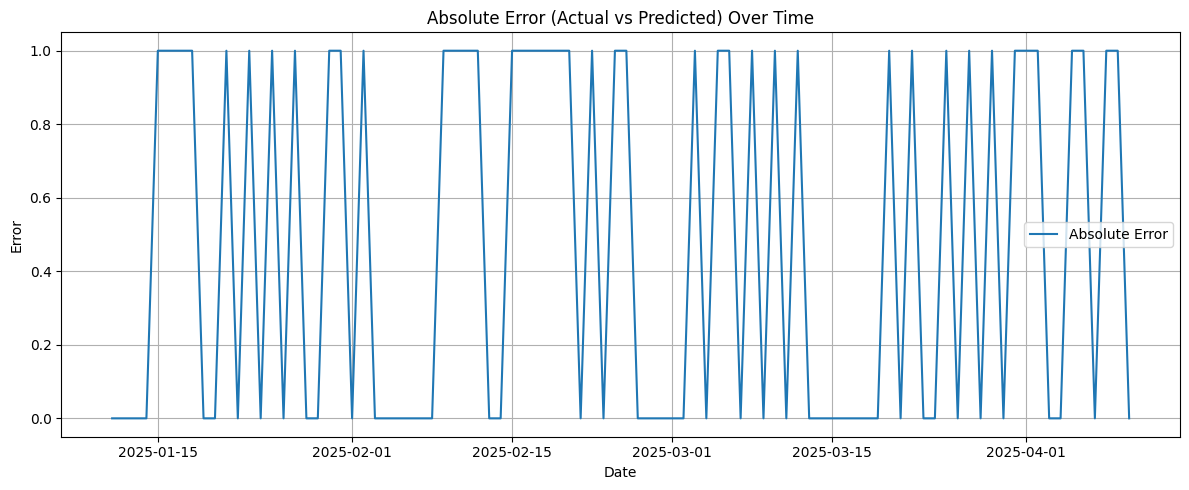

In [18]:
# Limit errors to last 90 days
plot_range = 90
errors = np.abs(y_pred[-plot_range:] - y_val.values[-plot_range:])
dates = dates[-plot_range:]

# Plot
plt.figure(figsize=(12, 5))
plt.plot(dates, errors, label="Absolute Error")
plt.xlabel("Date")
plt.ylabel("Error")
plt.title("Absolute Error (Actual vs Predicted) Over Time")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
